In [2]:
import pickle as pk
import numpy as np
from IPython.display import display, Markdown, Latex, clear_output

# Short notebook to write and practice on flashcards

Each flashcard is associated with a knowledge level. When you answer a flashcard correctly, it advances to the next knowledge level, and if you fail to answer, it goes back to the previous knowledge level.

To avoid implementing the spaced repetition technique, this simpler version associates exponentially decreasing probabilities with higher levels of knowledge.

## 1. Write into the dataset

In [2]:
flashcards = pk.load(open("flashcards.pk", 'rb'))

while(True):
    question = input('Write question : ')
    if question=='':
        break
    answer = input('Write answer : ')
    flashcards.append({
        'question': question,
        'answer': answer,
        'knowledge': 0
    })
    clear_output(wait=False)
    
pk.dump(flashcards, open("flashcards.pk", "wb"))

Write question : 


## 2. Practice

In [3]:
flashcards = pk.load(open("flashcards.pk", "rb"))

while(True):
    
    # Randomly choose flashcard index
    probas = np.array([2**-fc['knowledge'] for fc in flashcards])
    probas = probas/np.sum(probas)
    index = np.random.choice(len(flashcards), p=probas)
    fc = flashcards[index]
    
    # Display question
    print("\n\n\n\n\n\n\n\n\n\n\n\n\n")
    print("Knowledge : " + str(fc['knowledge']) + "\n")
    display(Latex(f'%s'%fc['question']))    
    answer = input("")
    
    # Process answer
    if answer=='d':
        del(flashcards[index])
    elif answer=='s':
        clear_output(wait=False)
        break
    else:
        display(Latex(f'%s'%fc['answer']))    
        answer = input('-> ')
        if answer=='y':
            fc['knowledge'] += 1
        elif answer=='n':
            fc['knowledge'] = max(0, flashcards[index]['knowledge']-1)
        elif answer=='d':
            del(flashcards[index])
        elif answer=='edit answer':
            new_answer = input('->')
            fc['answer'] = new_answer
        elif answer=='edit question':
            new_question = input('->')
            fc['question'] = new_question
        else:
            break
    clear_output(wait=False)

pk.dump(flashcards, open("flashcards.pk", "wb"))

.

.

.

.

.

.

.

.

.

.

# 3. View progress

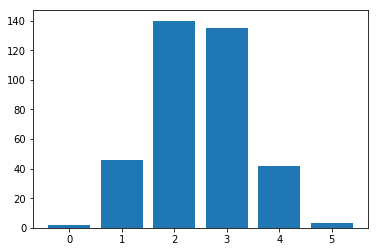

In [4]:
from matplotlib import pyplot as plt
plt.figure()
levels = np.array([fc['knowledge'] for fc in flashcards])
max_lvl = np.max(levels)
plt.bar(range(max_lvl +1 ), [np.sum(levels==i) for i in range(max_lvl+1)])
plt.show()